In [2]:
# IMPORTACIÓN DE LAS BIBLIOTECAS QUE NECESITAMOS USAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

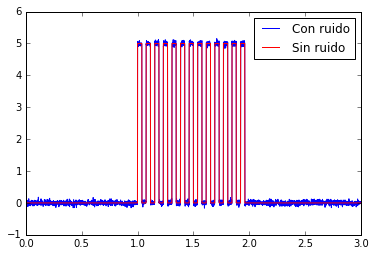

In [9]:
# Me genero unos datos de juguete
from scipy import signal

fs = 1000 #Hz
tmax = 3 # Tiempo (segundos) de registro
t = np.linspace(1/fs,tmax,tmax*fs)

f = 13. # Hz. Acuerdense del punto para que no sean enteros!!
t0 = 1
ciclos = 13
dur = ciclos/f
A = 5 # Amplitud en Volts

xo = A*(signal.square(2 * np.pi * f * t)+1)/2
xo[t<t0] = 0
xo[t>t0+dur] = 0

ruido = np.random.normal(0, 0.01*A, len(xo)) # Le sumo ruido con el 1% de la amplitud
x = xo + ruido

plt.plot(t, x, 'b-')
plt.plot(t, xo, 'r-')
plt.legend(("Con ruido","Sin ruido"), loc=1)
plt.show()

# Quiero detectar los flancos
## Opcion 1
1. Lo transformo en una variable logica {0,1} o {pasa, no pasa}, con un umbral (UMBRAL)
2. Tomo la diferencia entre dos puntos sucesivos
3. Si quiero los flancos ascendentes (descendentes) tomo los puntos en los que la diferencia es 1 (-1). 
Y si quiero ambos?
4. Esos son los tiempos (ti) en los que una franja de la cebra cruzo el photogate.

## Opcion 2
1. Me fijo si el siguiente punto es mayor (menor) que en UMBRAL mas el presente punto. Si se cumple, estoy ante un flanco ascendente (descendente).
2. Esos son los tiempos (ti) en los que una franja de la cebra cruzo el photogate.

# Vamos a ver la opcion 1 que es mas clara, pero pueden probar la 2 que es mas corta. 

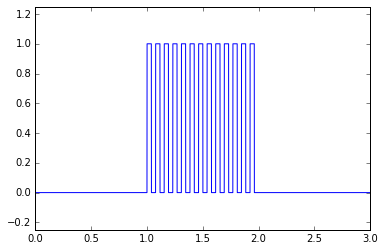

In [10]:
# 1. Lo transformo en una variable logica {0,1} o {pasa, no pasa}, con un umbral (UMBRAL)
UMBRAL = 4 # Lo elijo mirando el grafico
y = (x > UMBRAL)*1.
plt.plot(t, y)
plt.ylim(-.25, 1.25)
plt.show()

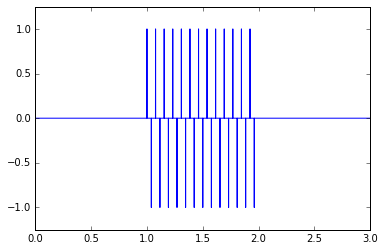

In [11]:
# 2. Tomo la diferencia entre dos puntos sucesivos
dy = y[1:len(y)] - y[0:(len(y)-1)]
plt.plot(t[0:(len(y)-1)], dy)
plt.ylim(-1.25, 1.25)
plt.show()

In [12]:
# 3. Si quiero los flancos ascendentes (descendentes) tomo los puntos en los que la diferencia es 1 (-1). 
ti = []
for item in range(0,len(dy)-1):
    if (dy[item]==1.):
        ti.append(t[item])
ti = np.asarray(ti)
# La forma python de hacer lo mismo
#items = [item for item in range(0,len(dy)-1) if (dy[item]==1.)]
#ti2 = t[items]
#ti2-ti

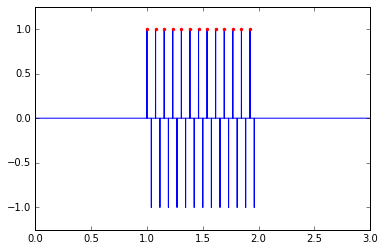

In [13]:
# 4. Esos son los tiempos (ti) en los que una franja de la cebra cruzo el photogate.
plt.plot(t[0:(len(y)-1)], dy,'b-')
plt.plot(ti, [1]*len(ti),'r.')
plt.ylim(-1.25, 1.25)
plt.show()


In [ ]:
# Ahora que tengo esos puntos quiero pasar a las velocidades...
# 1. El tiempo que cada franja obturo (y luego desobturo) el photogate es la diferencia entre los puntos.
# 2. La distancia recorrida es una franja oscura + un vacio
# 3. La velocidad "instantanea" es (distancia[i])/(ti[i+1] - ti[i])

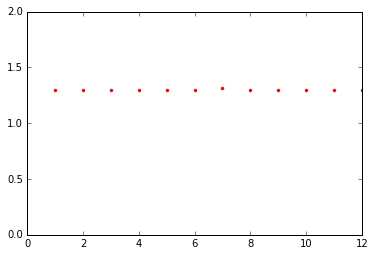

In [14]:
rendija = 0.055 # m
vacio = 0.045 # m
distancia = rendija + vacio
dt = ti[1:len(ti)] - ti[0:(len(ti)-1)]
vel = distancia / dt # m/s

plt.plot(np.linspace(1,len(vel),len(vel)), vel,'r.')
plt.ylim(0,2)
plt.show()

# Quien es el tiempo????

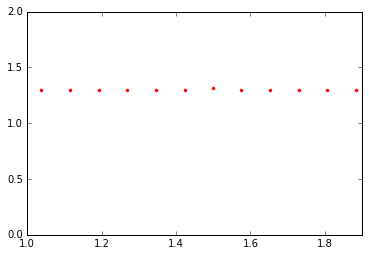

In [15]:
tprom = (ti[1:len(ti)] + ti[0:(len(ti)-1)])/2

plt.plot(tprom, vel,'r.')
plt.ylim(0,2)
plt.show()

In [ ]:
# Cual es la aceleracion?
# Como la calcularian?
# Cuales son los errores en cada variable?
# Como los calcularian?
# ...
